# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.

dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


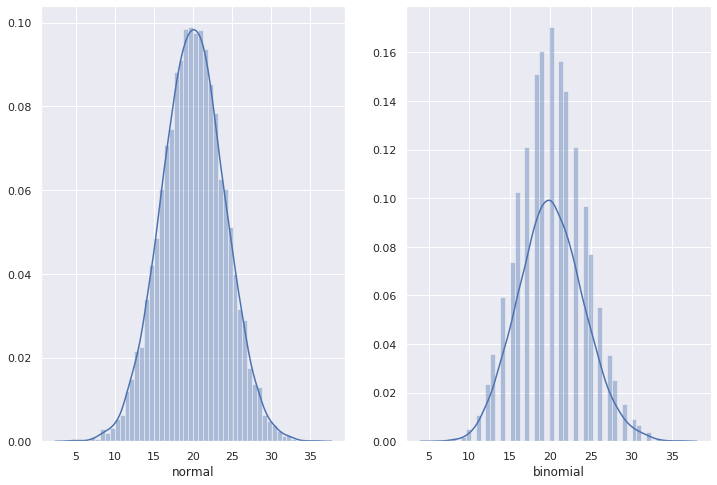

In [6]:
fig, axs = plt.subplots(ncols = 2)
sns.distplot(a = dataframe.normal, ax = axs[0])
sns.distplot(a = dataframe.binomial, ax = axs[1])

In [7]:
q1_norm = float(dataframe.normal.describe(include='all').loc['25%'])
q2_norm = float(dataframe.normal.describe(include='all').loc['50%'])
q3_norm = float(dataframe.normal.describe(include='all').loc['75%'])

print(q1_norm, q2_norm, q3_norm)
print(type(q1_norm))

17.30963787997159 19.98962009682849 22.68432355145866
<class 'float'>


In [8]:
q1_binom = float(dataframe.binomial.describe(include='all').loc['25%'])
q2_binom = float(dataframe.binomial.describe(include='all').loc['50%'])
q3_binom = float(dataframe.binomial.describe(include='all').loc['75%'])

print(q1_binom, q2_binom, q3_binom)
print(type(q1_binom))

17.0 20.0 23.0
<class 'float'>


In [9]:
q1_norm_binom = q1_norm - q1_binom
q2_norm_binom = q2_norm - q2_binom
q3_norm_binom = q3_norm - q3_binom
print(round(q1_norm_binom, 3), round(q2_norm_binom, 3), round(q3_norm_binom, 3))

0.31 -0.01 -0.316


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [11]:
def q1():
    q1_norm = float(dataframe.normal.describe(include='all').loc['25%'])
    q2_norm = float(dataframe.normal.describe(include='all').loc['50%'])
    q3_norm = float(dataframe.normal.describe(include='all').loc['75%'])
    
    q1_binom = float(dataframe.binomial.describe(include='all').loc['25%'])
    q2_binom = float(dataframe.binomial.describe(include='all').loc['50%'])
    q3_binom = float(dataframe.binomial.describe(include='all').loc['75%'])

    q1_norm_binom = float(round(q1_norm - q1_binom, 3))
    q2_norm_binom = float(round(q2_norm - q2_binom, 3))
    q3_norm_binom = float(round(q3_norm - q3_binom, 3))
    
    return tuple([q1_norm_binom, q2_norm_binom, q3_norm_binom])

q1()

(float, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

In [12]:
print(dataframe.normal.mean(), dataframe.normal.std())

19.991456066526293 4.013849522013614


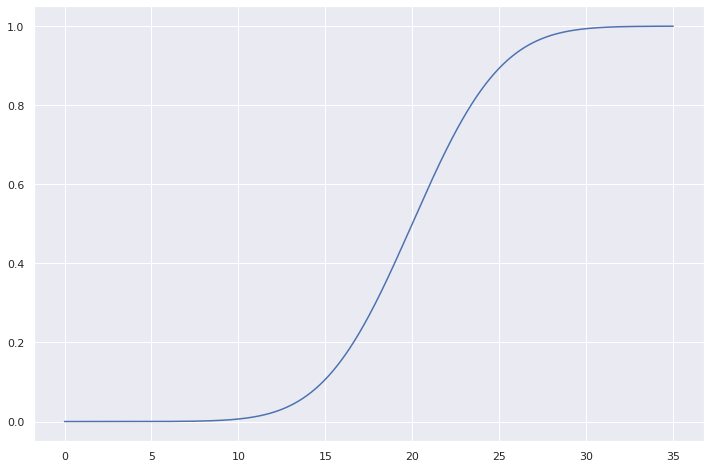

In [13]:
x = np.linspace(0, 35, num=1000)
f = lambda x: sct.norm.cdf(x, dataframe.normal.mean(), dataframe.normal.std())

cdf = f(x)

sns.lineplot(x, cdf)

In [23]:
ecdf = ECDF(dataframe.normal)

result = float(ecdf(dataframe.normal.mean() + dataframe.normal.std()) - ecdf(dataframe.normal.mean() - dataframe.normal.std()))
print(round(result, 3))

0.684


## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [26]:
def q2():
    ecdf = ECDF(dataframe.normal)

    result = float(ecdf(dataframe.normal.mean() + dataframe.normal.std()) - ecdf(dataframe.normal.mean() - dataframe.normal.std()))
    return (round(result, 3))

q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [21]:
m_binom = dataframe.binomial.mean()
v_binom = dataframe.binomial.var()

m_norm = dataframe.normal.mean()
v_norm = dataframe.normal.var()

m_norm_binom = round(m_binom - m_norm, 3)
v_norm_binom = round(v_binom - v_norm, 3)

print(m_norm_binom, v_norm_binom)

0.106 0.22


## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [20]:
def q3():
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()

    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()

    m_norm_binom = round(m_binom - m_norm, 3)
    v_norm_binom = round(v_binom - v_norm, 3)

    return tuple([(m_norm_binom), (v_norm_binom)])

q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [22]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [71]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [23]:
mean_profile_0 = stars.loc[stars.target == 0, 'mean_profile']
mean_profile_0.head()

0    102.507812
1    103.015625
2    136.750000
3     88.726562
4     93.570312
Name: mean_profile, dtype: float64

In [24]:
false_pulsar_mean_profile_standardized = ((mean_profile_0 - mean_profile_0.mean()) / mean_profile_0.std())
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
5        0.167270
6        0.790913
7       -0.532819
8       -0.532372
9        1.460155
10       0.955429
11       1.052887
12       0.079200
13       1.237074
14      -0.125551
15      -0.396020
16      -0.898957
17       1.117710
19      -0.896722
20      -0.636089
21      -1.184179
22       0.046118
23      -0.567242
24      -0.219880
25       0.817736
26       0.164588
27       0.380516
28      -0.797923
29      -0.369196
30      -0.952604
           ...   
17866    0.864677
17867   -1.127403
17868    1.191028
17869   -0.331644
17870    0.140000
17871    1.335427
17872   -1.551211
17873    0.571856
17874    0.948723
17876    0.099318
17877   -1.511423
17878   -0.509125
17879   -0.633406
17880    0.797619
17881    0.826230
17882   -1.839115
17883   -0.554277
17884    0.987617
17885    0.601361
17886    0.275458
17887   -1.020556
17888    0.575879
17889    1.551354
17890    0.110047
17891   -1

In [27]:
quant_08 = sct.norm.ppf(0.8, loc = 0, scale = 1)
quant_09 = sct.norm.ppf(0.9, loc = 0, scale = 1)
quant_095 = sct.norm.ppf(0.95, loc = 0, scale = 1)

result_ecdf = ECDF(false_pulsar_mean_profile_standardized)
print((round(result_ecdf(quant_08), 3)), (round(result_ecdf(quant_09), 3)), (round(result_ecdf(quant_095), 3)))

<class 'numpy.float64'> 0.911 0.959


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [29]:
def q4():
    mean_profile_0 = stars.loc[stars.target == 0, 'mean_profile']
    mean_profile_0.head()
    
    false_pulsar_mean_profile_standardized = ((mean_profile_0 - mean_profile_0.mean()) / mean_profile_0.std())
    
    quant_08 = sct.norm.ppf(0.8, loc = 0, scale = 1)
    quant_09 = sct.norm.ppf(0.9, loc = 0, scale = 1)
    quant_095 = sct.norm.ppf(0.95, loc = 0, scale = 1)

    result_ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    return tuple([(round(result_ecdf(quant_08), 3)), (round(result_ecdf(quant_09), 3)), (round(result_ecdf(quant_095), 3))])

q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

In [30]:
q1 = (false_pulsar_mean_profile_standardized.describe(include='all').loc['25%'])
q2 = (false_pulsar_mean_profile_standardized.describe(include='all').loc['50%'])
q3 = f(false_pulsar_mean_profile_standardized.describe(include='all').loc['75%'])

print(q1, q2, q3)

-0.647153176628595 0.03985946669725165 7.414217497802299e-07


In [31]:
q1_t = (sct.norm.ppf(0.25, loc=0, scale=1))
q2_t = (sct.norm.ppf(0.5, loc=0, scale=1))
q3_t = (sct.norm.ppf(0.75, loc=0, scale=1))

print(q1_t, q2_t, q3_t)

-0.6744897501960817 0.0 0.6744897501960817


In [32]:
q1_d = round(q1 - q1_t, 3)
q2_d = round(q2 - q2_t, 3)
q3_d = round(q3 - q3_t, 3)

print(q1_d, q2_d, q3_d)

0.027 0.04 -0.674


## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [35]:
def q5():
    q1 = (false_pulsar_mean_profile_standardized.describe(include='all').loc['25%'])
    q2 = (false_pulsar_mean_profile_standardized.describe(include='all').loc['50%'])
    q3 = (false_pulsar_mean_profile_standardized.describe(include='all').loc['75%'])
    
    q1_t = (sct.norm.ppf(0.25, loc=0, scale=1))
    q2_t = (sct.norm.ppf(0.5, loc=0, scale=1))
    q3_t = (sct.norm.ppf(0.75, loc=0, scale=1))
    
    q1_d = round(q1 - q1_t, 3)
    q2_d = round(q2 - q2_t, 3)
    q3_d = round(q3 - q3_t, 3)
    
    return tuple([q1_d, q2_d, q3_d])
    

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.